In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [2]:
df = pd.read_csv("Engineering_graduate_salary Mod.csv")

In [3]:
#digits = datasets.load_iris()
#X, y = digits.data, digits.target

X = df.loc[:, ['12graduation', '12percentage', 'collegeGPA', 'CollegeCityID', 'GraduationYear']]
y = df.loc[:, ['Salary']]

In [4]:
X.head()

,12graduation,12percentage,collegeGPA,CollegeCityID,GraduationYear
0,2007,75.20,76.60,176,2011
1,2010,85.40,79.39,1038,2014
2,2007,80.40,87.65,6884,2011
3,2008,63.33,71.00,8811,2014
4,2009,89.33,77.00,9099,2013


In [5]:
y.head()

,Salary
0,35000
1,35000
2,35000
3,40000
4,40000


In [6]:
param_range = np.arange(1, 30, 2)
train_scores, test_scores = validation_curve(RandomForestClassifier(),
X, y, param_name="n_estimators", param_range=param_range,
cv=4, scoring="accuracy", n_jobs=-1)

C:\Users\romer\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


In [7]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

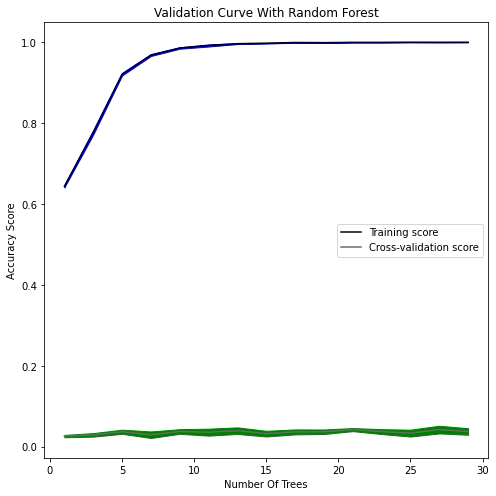

In [10]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green")
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()